## NLP & Binary Classification: Spam Collection Data
https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

** Dataset Information: **

a collection of more than 5 thousand SMS phone messages

** Attribute Information: (? features and 1 class)**

each line has the correct class followed by the raw message. We offer some examples bellow: 

ham What you doing?how are you?

ham Ok lar... Joking wif u oni... 
 
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop 

spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B 

** Objective of this project **

predict whether a message is spam or ham

# Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [4]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


# Exploratory Data Analysis

In [5]:
df['label'].value_counts() #imbalanced class --> stratify

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


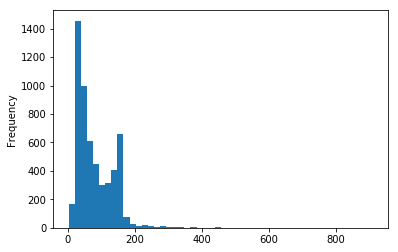

In [8]:
df['length'].plot(bins=50, kind='hist') #binomial

In [9]:
df.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [10]:
df[df['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D471419B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000027D4748E6A0>], dtype=object)

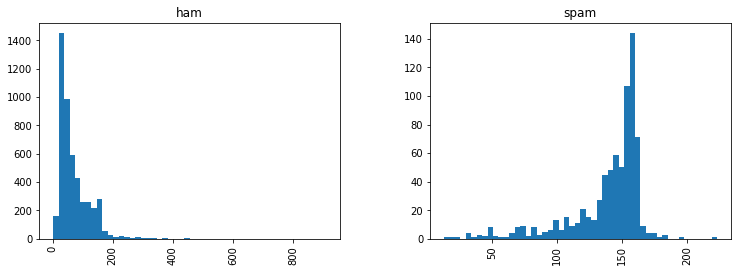

In [11]:
df.hist(column='length', by='label', bins=50,figsize=(12,4))

# Data preprocessing

** Split Features & Class **

In [12]:
X = df['message']
y = df['label']
print(X.shape,y.shape)

(5572,) (5572,)


** Split Train Test Sets **

In [13]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y,random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4457,) (1115,) (4457,) (1115,)


In [15]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array(['ham', 'spam'], dtype=object), array([3859,  598], dtype=int64))

# Model train

In [16]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
import string

# remove punctuation & stopwords
def text_process(mess):
    # remove punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # join agint to string
    nopunc = ''.join(nopunc) 
    # remove stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

# create a data pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), #tokenize
    ('tfidf', TfidfTransformer()),  #TF-IDF
    ('classifier', MultinomialNB()),  #Naive Bayes classifier
])

# train model
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000027D477D7B70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Accuracy: 97.7%


             precision    recall  f1-score   support

        ham       0.97      1.00      0.99      3859
       spam       1.00      0.83      0.91       598

avg / total       0.98      0.98      0.98      4457



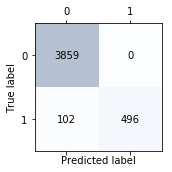

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#accuracy score
y_pred_train = pipeline.predict(X_train)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_train,y_pred_train)*100))

#classification report
print('\n')
print(classification_report(y_train, y_pred_train))

#confusion matrix
confmat = confusion_matrix(y_train, y_pred_train)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Model Evaluation with Test set

Accuracy: 97.0%


             precision    recall  f1-score   support

        ham       0.97      1.00      0.98       966
       spam       1.00      0.77      0.87       149

avg / total       0.97      0.97      0.97      1115



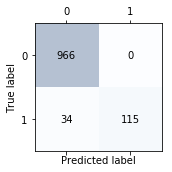

In [18]:
# predict class with test set (new, unseen)
y_pred_test = pipeline.predict(X_test)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_test,y_pred_test)*100))

#classification report
print('\n')
print(classification_report(y_test, y_pred_test))

#confusion matrix
confmat = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()